# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

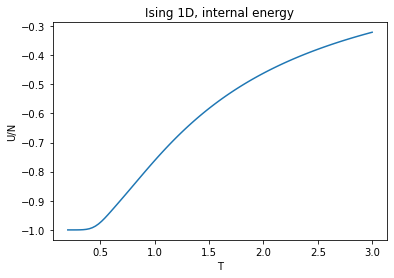

In [2]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

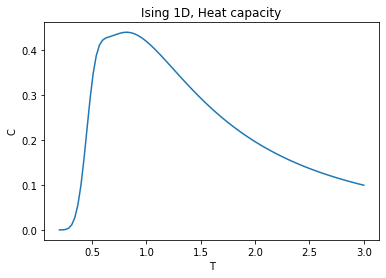

In [3]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.show()

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

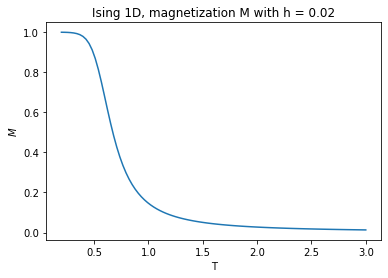

In [4]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

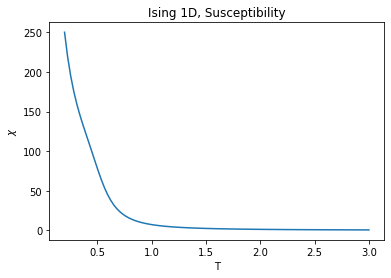

In [5]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

### Exercise 06.1

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

### Illustro l'andamento qualitativo delle osservabili termodinamiche
<br>

Nel seguente grafico è mostrato il risultato di un esperimento su una catena di $N=50$ spin sottoposte alle seguenti condizioni:

- Temperatura <b>$T = 2.0$</b>
- Intensità dell'accoppiamento tra primi vicini <b>$J = 1$</b>
- Campo magnetico esterno <b>$h = 0.0$</b>

L'esperimento consta di $Nstep=20000$ passi Monte Carlo, e il sistema è stato evoluto a ogni passo usando l'algoritmo di Metropolis.

<br>
A ogni passo dell'esperimento sono misurate sulla catena di spin le seguenti quantità osservabili macroscopiche:

- <b>Energia</b> 
$$
U(N,T) = \langle H \rangle = 
\langle
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
\rangle
$$

- <b>Capacità termica</b>, cioè risposta in energia corrispondente a una certa variazione della temperatura cui è sottoposto il sistema 
$$
C(N,T) = \frac{\partial U(N,T)}{\partial T} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

- <b>Magnetizzazione</b>
$$
M(N,T,h) = -\frac{\partial A}{\partial h} =
\left\langle \sum_{i=1,N}s_i \right\rangle
$$

- <b>Suscettibilità magnetica</b>, cioè risposta in magnetizzazione corrispondente a una certa variazione del campo magnetico esterno 
$$
\chi(N,T) = \frac{\partial M}{\partial h} 
= \beta \langle M^2 \rangle
$$

Queste osservabili sono valutate tutte a campo magnetico $h=0$, eccetto la magnetizzazione, che darebbe $0$ a campo nullo.
Sono tutte espresse per grado di libertà (cioè il valore misurato è stato diviso per $N=50$).

<br>
Il sistema è stato precedentemente lasciato evolvere per un buon numero di passi Monte Carlo a queste condizioni, fino a raggiungere un certo stato di equilibrio. Perciò si osserva una certa stabilità delle osservabili misurate.

<br>
Tutte queste informazioni sono contenute nel file <i>input.dat</i> che è stato passato al programma.


In questo file di configurazione è anche indicata la frequenza con cui dev'essere stimato l'errore sulla media delle osservabili misurate durante il progredire della simulazione.

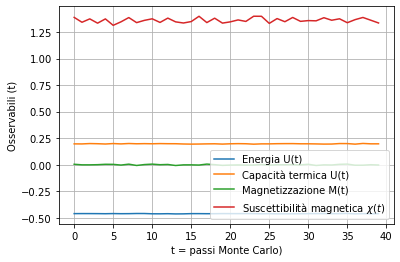

In [6]:
# Carico i file con le misure ottenute con Monte Carlo Ising 1D
# T=2, N=50spin, J=1, h=0.0, con 20000 passi dell'algoritmo
# Monte Carlo Metropolis, media stimata su 40 blocchi,
# configurazione già equilibrata

_ene = np.loadtxt(fname = "output.ene.0", usecols=(1))
_heat = np.loadtxt(fname = "output.heat.0", usecols=(1))
_mag = np.loadtxt(fname = "output.mag.0", usecols=(1))
_chi = np.loadtxt(fname = "output.chi.0", usecols=(1))

# Grafico delle misure

x = np.arange(len(_ene))  # tempo Monte Carlo
plt.errorbar(x,_ene, label ="Energia U(t)" )
plt.errorbar(x,_heat, label="Capacità termica U(t)")
plt.errorbar(x,_mag, label="Magnetizzazione M(t)")
plt.errorbar(x,_chi, label="Suscettibilità magnetica $\chi(t)$")

plt.xlabel('t = passi Monte Carlo)')
plt.ylabel('Osservabili (t)')
plt.grid(True)

plt.legend(loc="lower right")
plt.show()

### Illustro la stima delle incertezze

Una volta che il sistema ha raggiunto un certo stato di equilibrio posso considerare buona la misura delle osservabili. La loro stima è data dalla <b>media</b> delle misure prese a ciascun passo. Raggruppo le misure in blocchi e le uso per valutare l'<b>incertezza su questa stima</b>.
<br>
Nel seguente grafico è riportato l'andamento di questa media delle misure di energia, riportate nel grafico precedente, con la sua incertezza, durante il progredire della simulazione.

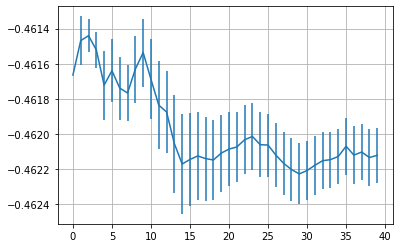

In [7]:
# Grafico della media dell'energia con la sua incertezza

medieEnergia = np.loadtxt(fname = "output.ene.0", usecols=(2))
incertezzeEnergia = np.loadtxt(fname = "output.ene.0", usecols=(3))

plt.errorbar(x,medieEnergia, incertezzeEnergia)
plt.grid(True)
plt.show()

### Illustro l'esecuzione del programma per varie condizioni esterne

Il programma <font face="courier">Monte_Carlo_ISING_1D.cpp</font> prende in ingresso il file <font face="courier">input.dat</font>, contenente in particolare le condizioni di temperatura $T$ e campo magnetico $h$, oltre che certi numeri da usare come semi della generazione di numeri casuali.

Restituisce in uscita un file <font face="courier">config.final</font>, contenente la configurazione della catena di spin raggiunta al termine dell'ultima esecuzione, e quattro file contenenti le misure di ciascuna quantità osservabile prese durante l'ultima esecuzione del programma, con le loro incertezze (sono le quattro curve mostrate nel grafico iniziale).

Per ciascuna di queste quattro collezioni di misure c'interessa in effetti solo l'ultimo valore medio con la sua incertezza, ossia l'ultimo valore delle colonne 2 e 3 (se numero le colonne a partire da zero). Questo valore costituisce un punto nel grafico $U(T)$ (se l'osservabile è ad esempio l'energia).

Vogliamo ora verificare che questi punti per un numero sufficiente di passi della simulazione si avvicinano arbitrariamente, e compatibilmente con le loro incertezze, alle curve teoriche riportate all'inizio. Quindi serve uno script che esegua il nostro programma tante volte quanti sono i valori di temperatura ai quali ci interessa stimare l'osservabile.

Per prima cosa dunque ci serve una semplice <i>routine</i> che permetta di impostare da qui la temperatura e le altre condizioni cui è sottoposto il sistema, cioè di modificare il file <font face="courier">input.dat</font>.

In [8]:
import subprocess
from os import path

# Funzione per scrivere automaticamente il file "input.dat"
def WriteInputValues(_temp=2, _nspin=50,                  \
                     _J=1.0, _h=0.0,                      \
                     _metro=1, _nstep=20000,              \
                     _nblk=40, _restart=1, _deleteData=1):
    
    with open("input.dat") as f:
        lines = f.readlines()
    lines[0] = str(_temp)+"\n"
    lines[1] = str(_nspin)+"\n"
    lines[2] = str(_J)+"\n"
    lines[3] = str(_h)+"\n"
    lines[4] = str(_metro)+"\n"
    lines[5] = str(_nblk)+"\n"
    lines[6] = str(_nstep)+"\n"
    lines[7] = str(_restart)+"\n"
    lines[8] = str(_deleteData)+"\n"
    
    with open("input.dat", "w") as f:
        f.writelines(lines)

Dichiariamo quindi la <i>routine</i> più importante, che richiama l'esecuzione del programma <font face="courier">Monte_Carlo_ISING_1D.cpp</font> con i parametri specificati, cioè quelli che vengono scritti in <font face="courier">input.dat</font>, più i quattro file nei quali saranno salvate le misure durante ciascuna esecuzione, e le destinazioni dove salvare i risultati finali, che andranno nella cartella <font face="courier">results</font>.

Questa <i>routine</i> controlla intanto se tali risultati esistono già nella cartella <font face="courier">results</font>, nel qual caso si limita a disegnarne il grafico.

In [9]:
# Funzione per eseguire il programma "./Monte_Carlo_ISING_1D.exe"
# con parametri selezionati

def MonteCarloExperiment(sourcePath="output.ene.0",      \
                         outPath="results/E(T).txt",     \
                         Tleft=0.5, Tright=2, points=64, \
                         h=0, metro=1, nstep=10000,      \
                         nblk=20,rerun=0):

    # Intervallo di punti di temperatura
    # per i quali fare la simulazione
    
    T = np.linspace(Tleft,Tright,num=points)
    
    if ( (not (path.exists(outPath)) ) or rerun):

        punti = np.zeros(shape=(len(T),3))

        for i in range (0,len(T)):
            
            WriteInputValues(_temp=T[i],_h=h,            \
                             _metro=metro,_nstep=nstep,  \
                             _nblk=nblk)
            
            # Launch Monte Carlo Ising 1D program
            process = subprocess.Popen("./Monte_Carlo_ISING_1D.exe",\
                                       stdout=subprocess.PIPE)
            process.wait()
            ###
        
            # Prendo media e incertezza, cioè l'ultimo valore
            # dei file di misure prodotte (tipo "output.ene.0")
            # e li metto in un vettore
            
            ave = np.loadtxt(fname = sourcePath, usecols=(2))
            err = np.loadtxt(fname = sourcePath, usecols=(3))

            punti[i] = [T[i],ave[len(ave)-1],err[len(err)-1]]

        # Li salvo in una cartella "results"
        np.savetxt(outPath,punti)

    # Faccio il grafico delle curve (tipo U(T))
    temperatura = np.loadtxt(fname = outPath, usecols=(0))
    _ave = np.loadtxt(fname = outPath, usecols=(1))
    _err = np.loadtxt(fname = outPath, usecols=(2))
    _color = "green"
    if (metro):
        _color="red"
    plt.errorbar(temperatura, _ave, _err,\
        color=_color,marker='.',markersize=1,linewidth=0, elinewidth=1)

Chiamo la <i>routine</i> che ho definito per le quattro osservabili che mi interessano: energia, capacità termica, magnetizzazione, suscettibilità magnetica. Per ciascuna valuto 64 punti della loro curva in funzione della temperatura. Per tutte le osservabili eseguo il programma due volte, una volta evolvendo la configurazione con l'algoritmo di Metropolis, e una seconda con l'algoritmo <i>Heath Bath</i> di Gibbs.

Le simulazioni sono eseguite al numero predefinito $Nstep=10000$ di passi Monte Carlo. Per la stima del calore specifico e della magnetiz<azione (valutata a $h=0.02$), tuttavia, si è trovato opportuno utilizzare invece un numero doppio di passi, necessari affinché la funzione stimata numericamente si avvicini ragionevolmente alla curva teorica.

Infatti mentre $10000$ passi sono più che sufficienti per energia e suscettibilità magnetica in questo intervallo di temperature, calore specifico e magnetizzazione anche sembrano convergere molto bene per valori maggiori di $1$, ma convergono più lentamente per valori minori di $1$.

Le incertezze valutate con la stima a blocchi sembrano rendere conto in maniera adeguata di questo discostarsi dalla curva teorica.

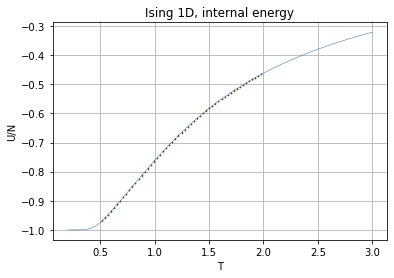

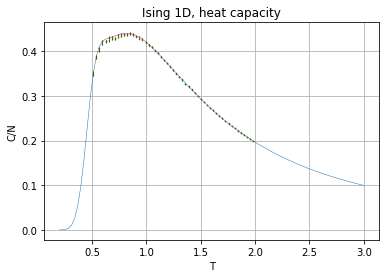

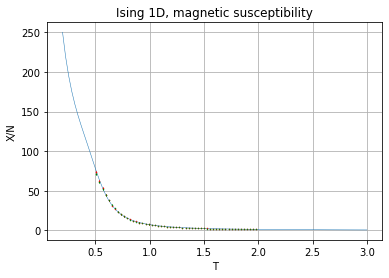

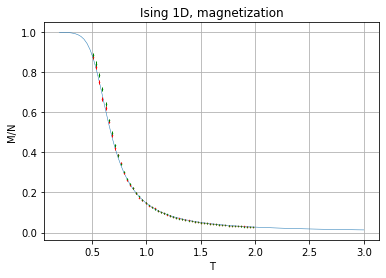

In [10]:
# Grafico dell'energia U(T)
plt.plot(T, e,linewidth=0.5)
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.grid(True)
# Eseguo l'esperimento se il risultato non è già presente
# nella cartella "results"
MonteCarloExperiment("output.ene.0","results/E(T)_Metropolis.txt",metro=1)
MonteCarloExperiment("output.ene.0","results/E(T)_Gibbs.txt",metro=0)
plt.show()


# Grafico della Capacità termica C(T)
plt.plot(T, heat,linewidth=0.5)
plt.title('Ising 1D, heat capacity')
plt.xlabel('T')
plt.ylabel('C/N')
plt.grid(True)
MonteCarloExperiment("output.heat.0","results/C(T)_Metropolis.txt",metro=1,\
                    nblk=40, nstep=20000)
MonteCarloExperiment("output.heat.0","results/C(T)_Gibbs.txt",metro=0,\
                    nblk=40, nstep=20000)
plt.show()


#Graficodella suscettibilità magnetica X(T)
plt.plot(T, X, linewidth=0.5)
plt.title('Ising 1D, magnetic susceptibility')
plt.xlabel('T')
plt.ylabel('X/N')
plt.grid(True)
MonteCarloExperiment("output.chi.0","results/X(T)_Metropolis.txt",metro=1)
MonteCarloExperiment("output.chi.0","results/X(T)_Gibbs.txt",metro=0)
plt.show()


plt.plot(T, M,linewidth=0.5)
plt.title('Ising 1D, magnetization')
plt.xlabel('T')
plt.ylabel('M/N')
plt.grid(True)
MonteCarloExperiment("output.mag.0","results/M(T)_Metropolis.txt",h=0.02,metro=1,\
                    nblk=40, nstep=20000)
MonteCarloExperiment("output.mag.0","results/M(T)_Gibbs.txt",h=0.02,metro=0,\
                    nblk=40, nstep=20000)
plt.show()